In [3]:
import pandas as pd

### 2 main datatypes

In [4]:
car_brands = pd.Series(['BMW', 'Toyota', 'Honda'])
car_brands

0       BMW
1    Toyota
2     Honda
dtype: object

##### series = 1-dimentional

In [5]:
colours = pd.Series(['Red', 'Blue', 'Black'])
colours

0      Red
1     Blue
2    Black
dtype: object

##### dataframe = 2-dimentional

In [6]:
car_data = pd.DataFrame({'Car make': car_brands, 'Colour' : colours})
car_data

,Car make,Colour
0,BMW,Red
1,Toyota,Blue
2,Honda,Black


##### Importing data

In [7]:
car_sales = pd.read_csv('car-sales-extended.csv')
car_sales.head(10)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
5,Honda,Red,42652,4,23883
6,Toyota,Blue,163453,4,8473
7,Honda,White,43120,4,20306
8,Nissan,White,130538,4,9374
9,Honda,Blue,51029,4,26683


##### exporting a dataframe

In [8]:
exported_car_sales = car_sales.to_csv('exported-car-sales-extended.csv')
car_sales.head(10)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
5,Honda,Red,42652,4,23883
6,Toyota,Blue,163453,4,8473
7,Honda,White,43120,4,20306
8,Nissan,White,130538,4,9374
9,Honda,Blue,51029,4,26683


## Describing data

In [9]:
car_sales.dtypes  #Attribute (doesn't have braces) while functions do

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [10]:
car_sales.columns

Index(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price'], dtype='object')

In [11]:
car_sales.index

RangeIndex(start=0, stop=1000, step=1)

In [12]:
car_sales.describe()

,Odometer (KM),Doors,Price
count,1000.000000,1000.000000,1000.000000
mean,131073.708000,4.014000,16045.665000
std,68859.723885,0.379405,8630.794219
min,10148.000000,3.000000,2796.000000
25%,71238.000000,4.000000,9481.500000
50%,131202.000000,4.000000,14264.000000
75%,192372.750000,4.000000,20738.750000
max,249860.000000,5.000000,52458.000000


In [13]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           1000 non-null   object
 1   Colour         1000 non-null   object
 2   Odometer (KM)  1000 non-null   int64 
 3   Doors          1000 non-null   int64 
 4   Price          1000 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


## Viewing and selecting data

##### .loc and .iloc

In [14]:
animals = pd.Series(['Dragon', 'Dog', 'Cat', 'Panda', 'Penguine'], index=[5,9,6,7,6])
animals

5      Dragon
9         Dog
6         Cat
7       Panda
6    Penguine
dtype: object

In [15]:
animals.loc[6] # .loc(i) gives rows having index == i

6         Cat
6    Penguine
dtype: object

In [16]:
car_sales.loc[6]

Make             Toyota
Colour             Blue
Odometer (KM)    163453
Doors                 4
Price              8473
Name: 6, dtype: object

In [17]:
animals.iloc[4] # .iloc[i] works like list indexing

'Penguine'

In [18]:
animals.iloc[:3]

5    Dragon
9       Dog
6       Cat
dtype: object

In [19]:
car_sales.iloc[:3]

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343


## Comparing
##### crosstab

In [20]:
pd.crosstab(car_sales['Make'], car_sales['Doors'])

Doors,3,4,5
Make,,,
BMW,21,0,79
Honda,0,304,0
Nissan,44,154,0
Toyota,0,398,0


##### groupby

In [21]:
car_sales.groupby(['Make']).mean()

,Odometer (KM),Doors,Price
Make,,,
BMW,123540.800000,4.580000,27089.830000
Honda,124667.671053,4.000000,14514.200658
Nissan,135480.308081,3.777778,13658.368687
Toyota,135667.223618,4.000000,15628.160804


<AxesSubplot:>

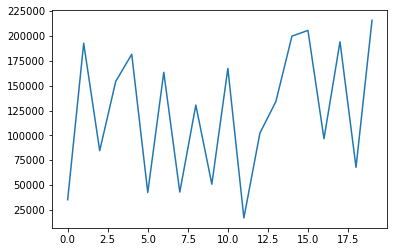

In [22]:
car_sales['Odometer (KM)'].head(20).plot()

## Manipulating Data

In [23]:
 car_sales.Make.str.lower()

0       honda
1         bmw
2       honda
3      toyota
4      nissan
        ...  
995    toyota
996    nissan
997    nissan
998     honda
999    toyota
Name: Make, Length: 1000, dtype: object

In [24]:
car_sales_missing = pd.read_csv('https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv')
car_sales_missing.head(100)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
95,Honda,Blue,143707.0,4.0,16337.0
96,Toyota,Blue,29856.0,4.0,11392.0
97,Toyota,Black,133433.0,4.0,16519.0
98,Toyota,Red,147455.0,4.0,22296.0


In [25]:
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(), inplace = True)
car_sales_missing['Odometer (KM)'].isna().value_counts()

False    1000
Name: Odometer (KM), dtype: int64

In [26]:
groupby_make = car_sales_missing.groupby('Make')
groupby_make.mean()

,Odometer (KM),Doors,Price
Make,,,
BMW,127724.128117,4.548387,26902.440860
Honda,125521.997707,4.000000,14618.661922
Nissan,136475.074409,3.782857,13664.502857
Toyota,135732.242861,4.000000,15715.257062


In [27]:
car_sales_missing[['Make','Price']].isna().value_counts()

Make   Price
False  False    903
       True      48
True   False     47
       True       2
dtype: int64

##### New column called seats

In [28]:
car_sales_missing['Seats'] = pd.Series([5 for i in range(500)]) #lengths need not match for pd.Series
car_sales_missing['Seats'].isna().value_counts()

False    500
True     500
Name: Seats, dtype: int64

In [29]:
car_sales_missing['Seats'].fillna(5, inplace = True)
car_sales_missing['Seats'].isna().value_counts()

False    1000
Name: Seats, dtype: int64

##### New column called Fuel per 100KM

In [30]:
import random
# lengths need to match for list
car_sales_missing['Fuel per 100KM'] = [round(random.random()*10, 1) for i in range(1000)]
car_sales_missing['Fuel per 100KM'].isna().value_counts()

False    1000
Name: Fuel per 100KM, dtype: int64

In [31]:
car_sales_missing['Total fuel used'] = car_sales['Odometer (KM)']/100 * car_sales_missing['Fuel per 100KM']

##### Shuffling DataFrame

In [32]:
car_sales_shuffled = car_sales_missing.sample(frac = 1)

In [33]:
car_sales_shuffled.reset_index(drop = True, inplace = True)

In [34]:
car_sales_shuffled.head(10)

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Total fuel used
0,Toyota,White,83594.0,NaN,13648.0,5.0,8.6,7189.084
1,Honda,Blue,37678.0,4.0,6361.0,5.0,8.0,3014.240
2,Honda,NaN,41846.0,4.0,10241.0,5.0,6.5,2719.990
3,Honda,Black,134825.0,4.0,17315.0,5.0,9.3,12538.725
4,Toyota,White,69222.0,4.0,29363.0,5.0,9.5,6576.090
5,Honda,White,13116.0,4.0,16464.0,5.0,3.5,459.060
6,Toyota,Green,37703.0,4.0,NaN,5.0,7.9,2978.537
7,Honda,White,211862.0,4.0,12476.0,5.0,2.5,5296.550
8,Toyota,Blue,186309.0,4.0,16416.0,5.0,6.9,12855.321
9,BMW,Black,11049.0,3.0,19500.0,5.0,5.5,607.695


In [35]:
car_sales_shuffled['Odometer (KM)'] = car_sales_shuffled['Odometer (KM)'].apply(lambda x: x/1.609)
car_sales_shuffled['Odometer (KM)']

0       51954.008701
1       23417.029211
2       26007.458048
3       83794.282163
4       43021.752641
           ...      
995     83394.033561
996     93587.321318
997     74152.268490
998     74231.821007
999    143141.081417
Name: Odometer (KM), Length: 1000, dtype: float64